# Color Legend

- **Black:** Headings
- **Blue:** Subheadings
- **Grey:** Conclusions / Observations
- **Yellow:** Suggestions
- **Orange:** ML Heading / Hypothesis
- **Red:** Hypothesis conclusions
- **Pink:** Tableau links

---

<div style="background-color: black; color: white; padding: 10px;">
    
# Importing Libraries 
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

<div style="background-color: black; color: white; padding: 10px;">
    
# Importing Data for Plant 1
    
</div>

## <a href="https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data?select=Plant_1_Weather_Sensor_Data.csv">Link of dataset </a>

In [2]:
#Plant geneartion dataset
pg1=pd.read_csv("Plant_1_Generation_Data.csv")

#Weather dataset
w1=pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [3]:
pg1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
w1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,5/15/2020 0:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,5/15/2020 0:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,5/15/2020 0:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,5/15/2020 0:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,5/15/2020 1:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


<div style="background-color: black; color: white; padding: 10px;">
    
# Understanding Data Columns
    
</div>

In [5]:
# Making column names to lower case
pg1.columns=pg1.columns.str.lower()
w1.columns=w1.columns.str.lower()

In [6]:
# Info of datasets
display(pg1.info()) 
print("---------------------------------------------------------------------------------\n")
display(w1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    68778 non-null  object 
 1   plant_id     68778 non-null  int64  
 2   source_key   68778 non-null  object 
 3   dc_power     68778 non-null  float64
 4   ac_power     68778 non-null  float64
 5   daily_yield  68778 non-null  float64
 6   total_yield  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


None

---------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            3182 non-null   object 
 1   plant_id             3182 non-null   int64  
 2   source_key           3182 non-null   object 
 3   ambient_temperature  3182 non-null   float64
 4   module_temperature   3182 non-null   float64
 5   irradiation          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


None

<div style="background-color: darkblue; color: white; padding: 5px;">
    
## DATE_TIME

</div>

In [7]:
# Converting Date_Time column from object to date time in pg1 dataset
pg1['date_time']=pd.to_datetime(pg1['date_time'], format='%d-%m-%Y %H:%M')

# Converting Date_Time column from object to date time in w1 dataset
w1['date_time']=pd.to_datetime(w1['date_time'], format='%m/%d/%Y %H:%M')

In [8]:
pg1.date_time.dt.date.nunique(), w1.date_time.dt.date.nunique()

(34, 34)

In [9]:
pg1.date_time.dt.time.nunique(), w1.date_time.dt.time.nunique()

(96, 96)

In [10]:
print(pg1.date_time.max())
print(pg1.date_time.min())

2020-06-17 23:45:00
2020-05-15 00:00:00


<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> This data contains 34 days.<br>
> The data is observed for every 15 minutes in a day i.e. 96 observe points in a day.<br>
> The data starts from date 15/05/2020 and ends on 17/06/2020.
    
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">
    
## PLANT_ID
     
</div>

In [11]:
pg1['plant_id'].unique()

array([4135001], dtype=int64)

<div style="background-color: lightgray; padding: 5px;">
    
### Observation:
> The dataset is for 1 plant only having plant id '4135001'.<br>
>  As per the data collector explanation this plant is from Andhra Pradesh.

</div>

In [12]:
# We can drop the column as this is same for each row (redundancy)
pg1.drop(columns='plant_id',inplace=True)

In [13]:
w1.drop(columns='plant_id',inplace=True)

<div style="background-color: darkblue; color: white; padding: 5px;">

## SOURCE_KEY of pg1
    
</div>

In [14]:
pg1.source_key.nunique()

22

In [15]:
pg1.source_key.unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> Source_keys are Unique identifier for each inverter (the device that converts DC power generated by solar panels into AC power).<br>
> There are 22 inverters in this plant.
    
</div>

In [16]:
pg1.source_key.memory_usage(deep=True)

4952144

In [17]:
# Changing source_key dtype from object to category to make it more efficient.

In [18]:
pg1['source_key'] = pg1['source_key'].astype('category')

In [19]:
pg1.source_key.memory_usage(deep=True)

71046

<div style="background-color: darkblue; color: white; padding: 5px;">

## SOURCE_KEY of w1
 
</div>

In [20]:
w1.source_key.nunique(), w1.source_key.unique()

(1, array(['HmiyD2TTLFNqkNe'], dtype=object))

<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> Here Source_key refers to the sensor that is installed only 1 for the whole plant.<br>
> Its source_key is 'HmiyD2TTLFNqkNe'.
    
</div>

In [21]:
# We can drop the column as this is same for each row (redundancy)
w1.drop(columns='source_key',inplace=True)

<div style="background-color: darkblue; color: white; padding: 5px;">

## DC_Power
    
</div>

In [22]:
pg1.dc_power.nunique()

32909

<div style="background-color: lightgray; padding: 5px;">
    
### Observation:
> This is the DC (direct current) power generated by the solar panels. When it's 0, it means no power is being generated at that moment.<br>
> Unit: kW
    
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">

## AC_Power
</div>

In [23]:
pg1.ac_power.nunique()

32686

<div style="background-color: lightgray; padding: 5px;">
    
### Observation:
> AC (alternating current) power represents the output of the inverter. A value of 0 indicates no power output.<br>
> Unit: kW
        
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">

## Daily_yield
</div>

In [24]:
pg1.daily_yield.nunique()

29900

In [25]:
print(f"Minimum daily yield: {pg1.daily_yield.min()}\nMaximum daily yield: {pg1.daily_yield.max()}")

Minimum daily yield: 0.0
Maximum daily yield: 9163.0


<div style="background-color: lightgray; padding: 5px;">
    
### observation:
> Total power generated by a solar inverter in a day up to that point<br>
> Max daily yield corresponds to 9163.0 kWh
        
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">

## Total_yield
</div>

In [26]:
pg1.total_yield.nunique()

37267

In [27]:
print(f"Maximum Total yield: {pg1.total_yield.max()}")

Maximum Total yield: 7846821.0


<div style="background-color: lightgray; padding: 5px;">
    
### Observation:
> Total yeild refers to Cumulative total power generated by a solar inverter since it was installed.<br>
> Maximum Total yield correspond to 7846821 kWh
        
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">

## Ambient_Temperature
</div>

In [28]:
w1.ambient_temperature.nunique()

3182

In [29]:
print(f"Range of Ambient temperature: {w1.ambient_temperature.min():.2f} to {w1.ambient_temperature.max():.2f}")

Range of Ambient temperature: 20.40 to 35.25


<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> The temperature of the surrounding environment.<br>
> Range of it is 20.40 to 35.25<br>
> There is no indication of temperature unit but it must be degree celsius as India use it.
        
</div>

 <div style="background-color: darkblue; color: white; padding: 5px;">

 ## Module_temperature
</div>

In [30]:
w1.module_temperature.nunique()

3181

In [31]:
print(f"Range of module temperature: {w1.module_temperature.min():.2f} to {w1.module_temperature.max():.2f}")

Range of module temperature: 18.14 to 65.55


<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> The temperature of the solar modules (panels).<br>
> Range of it is 18.14 to 65.55<br>
> There is no indication of temperature unit but it must be degree celsius as India use it.
        
</div>

<div style="background-color: darkblue; color: white; padding: 5px;">

## Irradiation
</div>

In [32]:
w1.irradiation.nunique()

1758

In [33]:
print(f"Range of module temperature: {w1.irradiation.min():.2f} to {w1.irradiation.max():.2f}")

Range of module temperature: 0.00 to 1.22


<div style="background-color: lightgray; padding: 5px;">
    
### Observations:
> The amount of solar irradiance (sunlight) received by the solar panels. A value of 0 may indicate nighttime or periods with no sunlight.<br>
> Solar Irradiance is usually measured in W/m². (Note that this is Power per square meter, not Energy per square meter)
    
</div>

# -----------------------------------------------------------------------------------------------------------

<div style="background-color: black; color: white; padding: 10px;">

# Checking for anomaly values
    
</div>

In [34]:
pg1.isnull().sum()

date_time      0
source_key     0
dc_power       0
ac_power       0
daily_yield    0
total_yield    0
dtype: int64

In [35]:
w1.isnull().sum()

date_time              0
ambient_temperature    0
module_temperature     0
irradiation            0
dtype: int64

<div style="background-color: lightgray; padding: 5px;">
    
### No value is Null
 
</div>

# ---------------------------------

In [36]:
pg1.shape

(68778, 6)

In [37]:
# Checking where dc power and ac power both 0
pg1.query('(dc_power == 0) & (ac_power == 0)')

,date_time,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [38]:
# Checking for the night time
df_night = pg1.query("(date_time.dt.hour >= 18 and date_time.dt.minute >= 45) or (date_time.dt.hour >=19) or (date_time.dt.hour < 6)")
df_night

,date_time,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [39]:
df_night.dc_power.unique(), df_night.ac_power.unique()

(array([0.]), array([0.]))

<div style="background-color: lightgray; padding: 5px;">
    
## Conclusion:
> At night time i.e. from 6:45PM to 6AM there is no power generation.
  
</div>

In [40]:
df_morning = pg1.query("(date_time.dt.hour >= 6 and date_time.dt.hour < 19) and (date_time.dt.hour != 18 or date_time.dt.minute < 45) and dc_power == 0 and ac_power == 0")
df_morning

,date_time,source_key,dc_power,ac_power,daily_yield,total_yield
515,2020-05-15 06:00:00,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
815,2020-05-15 09:15:00,zVJPv84UY57bAof,0.0,0.0,711.0,7116862.0
837,2020-05-15 09:30:00,zVJPv84UY57bAof,0.0,0.0,711.0,7116862.0
1608,2020-05-15 18:30:00,1BY6WEcLGh8j5v7,0.0,0.0,5754.0,6265313.0
1609,2020-05-15 18:30:00,1IF53ai7Xc0U56Y,0.0,0.0,6357.0,6190002.0
...,...,...,...,...,...,...
67257,2020-06-17 06:00:00,z9Y9gH1T5YWrNuG,0.0,0.0,0.0,7245385.0
67258,2020-06-17 06:00:00,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6577552.0
67259,2020-06-17 06:00:00,zVJPv84UY57bAof,0.0,0.0,0.0,7357362.0
67271,2020-06-17 06:45:00,bvBOhCH3iADSZry,0.0,0.0,0.0,6533549.0


In [41]:
df_morning.dc_power.unique(), df_morning.ac_power.unique()

(array([0.]), array([0.]))

In [42]:
date_counts = df_morning['date_time'].dt.date.value_counts()
date_counts

2020-05-19    74
2020-05-17    42
2020-05-26    35
2020-06-07    33
2020-05-15    25
2020-06-14    24
2020-05-16    22
2020-05-18    22
2020-06-12    22
2020-05-22    22
2020-06-11    22
2020-06-10    22
2020-06-17    19
2020-06-16    18
2020-05-21    16
2020-05-25    11
2020-06-06    10
2020-05-29     6
2020-05-27     5
2020-05-24     2
2020-06-05     1
2020-06-09     1
2020-05-20     1
2020-06-15     1
Name: date_time, dtype: int64

<div style="background-color: lightgray; padding: 5px;">
    
## Conclusion:
> There are no instances where the DC power is consistently zero for an entire day, it indicates that sunlight is generally present throughout the day.<br>
> But some inverters might have shadows or other factors causing their DC power readings to be zero at specific times.
   
</div>

<div style="background-color: yellow; padding: 10px;">

## Suggestion:
### If this is due to shadows then optimizing the positioning and layout of solar panels is indeed crucial for maximizing power generation.
</div>

# ----------------------------------

## Merging both plant generation dataset and weather dataset

In [43]:
merged_df = pd.merge(pg1, w1, on='date_time', how='inner')

In [44]:
merged_df.isna().sum()

date_time              0
source_key             0
dc_power               0
ac_power               0
daily_yield            0
total_yield            0
ambient_temperature    0
module_temperature     0
irradiation            0
dtype: int64

In [45]:
merged_df.describe()

,dc_power,ac_power,daily_yield,total_yield,ambient_temperature,module_temperature,irradiation
count,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000
mean,3147.177450,307.778375,3295.834644,6.978728e+06,25.558521,31.244997,0.232305
std,4036.441826,394.394865,3145.220597,4.162707e+05,3.361300,12.308283,0.301948
min,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000
50%,428.571429,41.450000,2658.473214,7.146685e+06,24.670178,24.818984,0.031620
75%,6365.468750,623.561161,6274.000000,7.268751e+06,27.960429,41.693659,0.454880
max,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


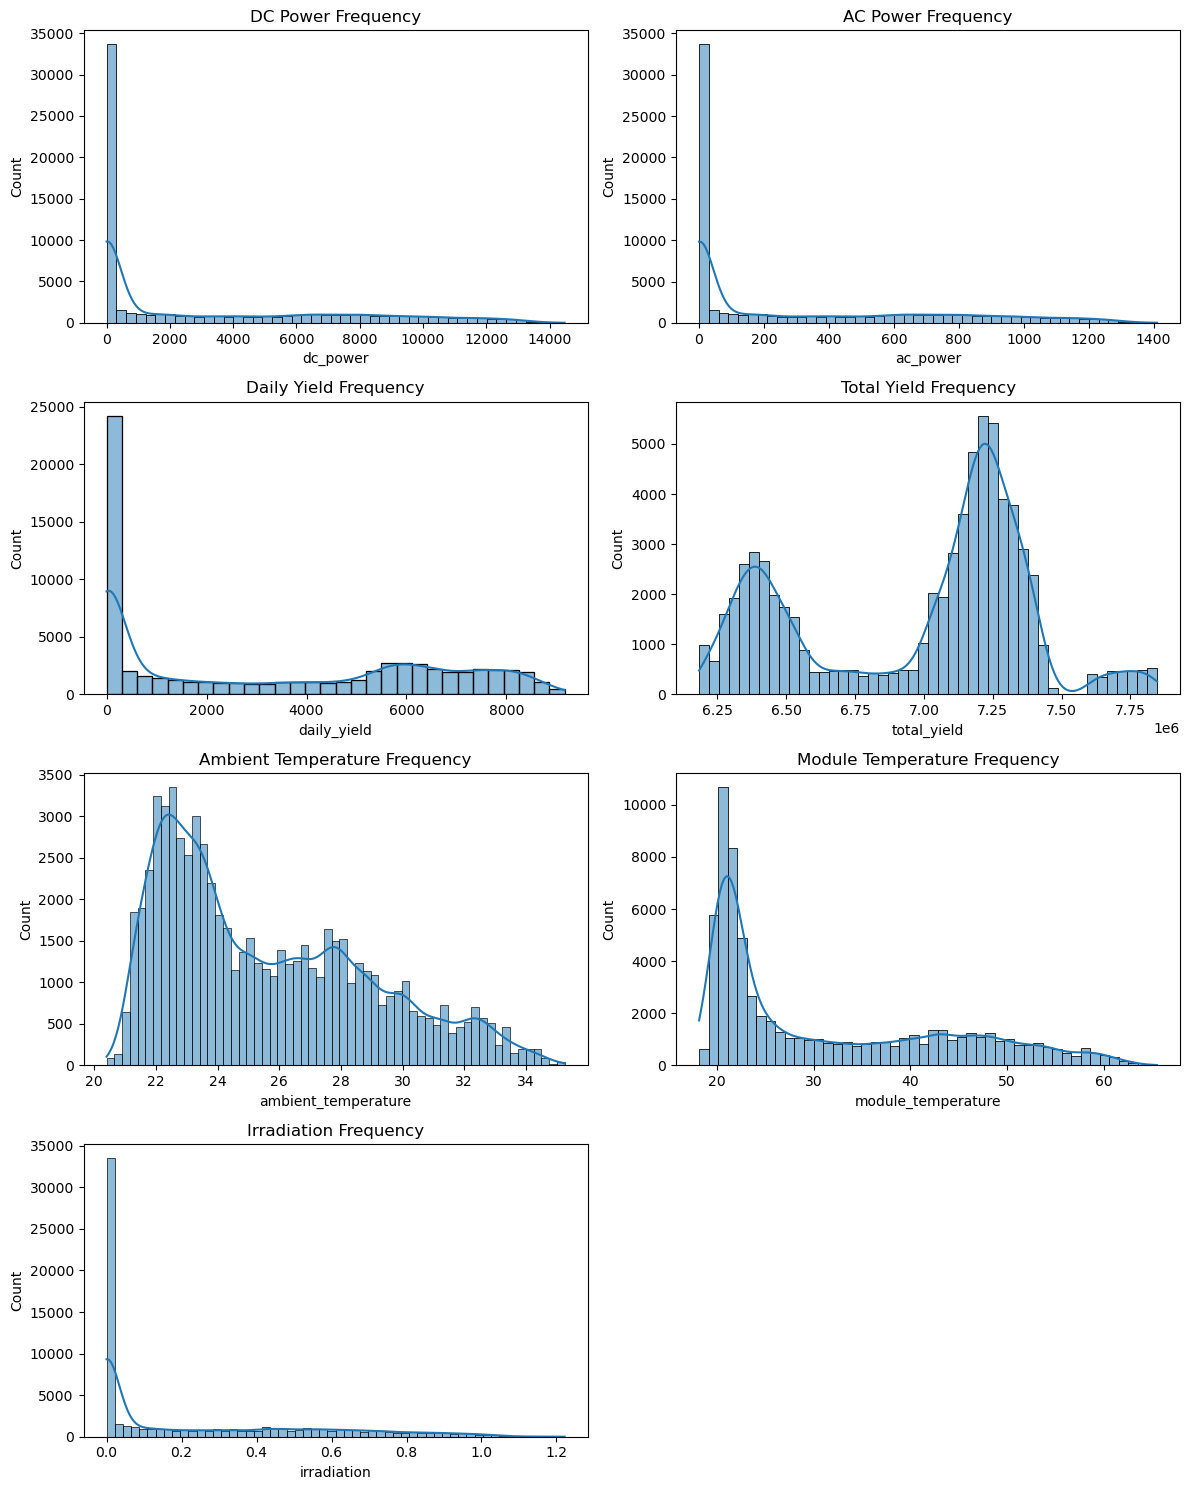

In [46]:
plt.figure(figsize=(12, 15))

plt.subplot(4, 2, 1)
sns.histplot(merged_df['dc_power'],kde=True)
plt.title('DC Power Frequency')

plt.subplot(4, 2, 2)
sns.histplot(merged_df['ac_power'],kde=True)
plt.title('AC Power Frequency')

plt.subplot(4,2,3)
sns.histplot(merged_df.daily_yield,kde=True)
plt.title("Daily Yield Frequency")

plt.subplot(4,2,4)
sns.histplot(merged_df.total_yield,kde=True)
plt.title("Total Yield Frequency")

plt.subplot(4,2,5)
sns.histplot(merged_df.ambient_temperature,kde=True)
plt.title("Ambient Temperature Frequency")

plt.subplot(4,2,6)
sns.histplot(merged_df.module_temperature,kde=True)
plt.title("Module Temperature Frequency")

plt.subplot(4,2,7)
sns.histplot(merged_df.irradiation,kde=True)
plt.title("Irradiation Frequency")

plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    
## Observations:
#### Plot DC Power Frequency: 
> It's value goes from 0 to 12000.<br>
> It's graph is flat it suggests a daily cyclic pattern. This pattern aligns with the movement of the sun, which affects DC power generation.

#### Plot AC Power Frequency:
> It's value goes from 0 to 1200.<br>
> It's graph is flat it suggests a daily cyclic pattern. As the DC power increases it also increases and vice-versa.

#### Daily Yield Frquency:
> It goes from 0 to 8000.<br>
> Mostly the value from 5000kW to 8500kW are produced.

#### Total Yield Frequency:
> It goes from 6.25e6 to 7.75e6<br>

#### Ambient Temperature:
> Temperature ranges from 20 to 34.<br>
> Mostly the temperature is around 22.

#### Module Temperature:
> Temperature ranges from 20 to 60.<br>
> Mostly the temperature is around 22.

#### Irradiation:
> Its graph is also flat depecting daily cyclic pattern.


In [47]:
## Checking for efficiency of inverter
eff = 100*np.max(merged_df.ac_power)/np.max( merged_df.dc_power)
print(f"Power ratio AC/DC (Efficiency) of plant #1: {eff:0.3f}%")

Power ratio AC/DC (Efficiency) of plant #1: 9.750%


<div style="background-color: yellow; padding: 10px;">
 
## Suggestion:
### The inverter efficiency is very low. It can be due to bad inverters, bad data collection etc.<br> Inverters should be maintained or replaced to increase the efficiency and decrease the power loss.

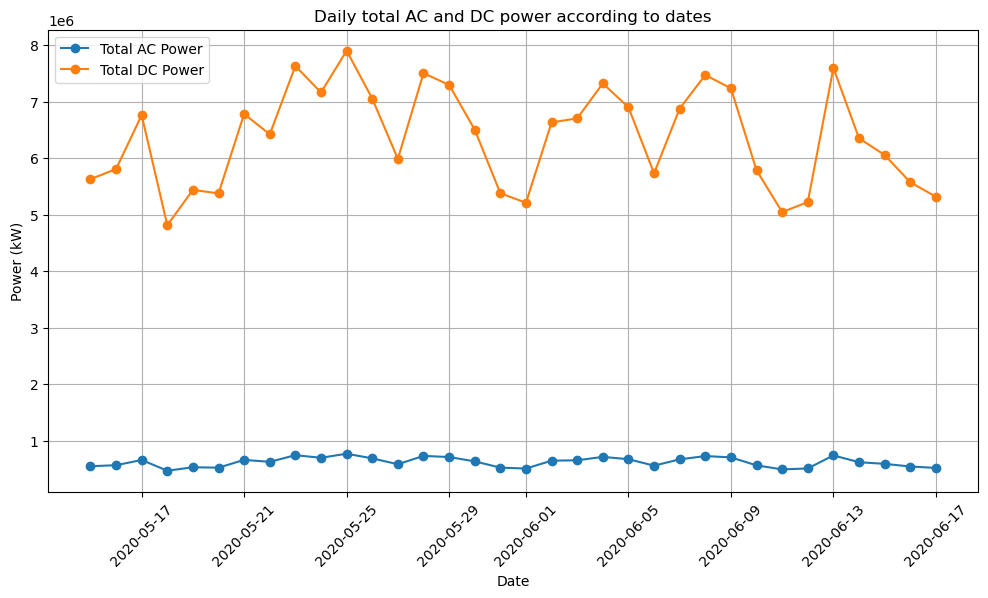

In [48]:
# Daily Total AC and DC Power graph

merged_df['date'] = merged_df['date_time'].dt.date

daily_sum_ac = merged_df.groupby('date')['ac_power'].sum()
daily_sum_dc = merged_df.groupby('date')['dc_power'].sum()

plt.figure(figsize=(12, 6))

plt.plot(daily_sum_ac.index, daily_sum_ac, label='Total AC Power', marker='o')
plt.plot(daily_sum_dc.index, daily_sum_dc, label='Total DC Power', marker='o')


plt.title('Daily total AC and DC power according to dates')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

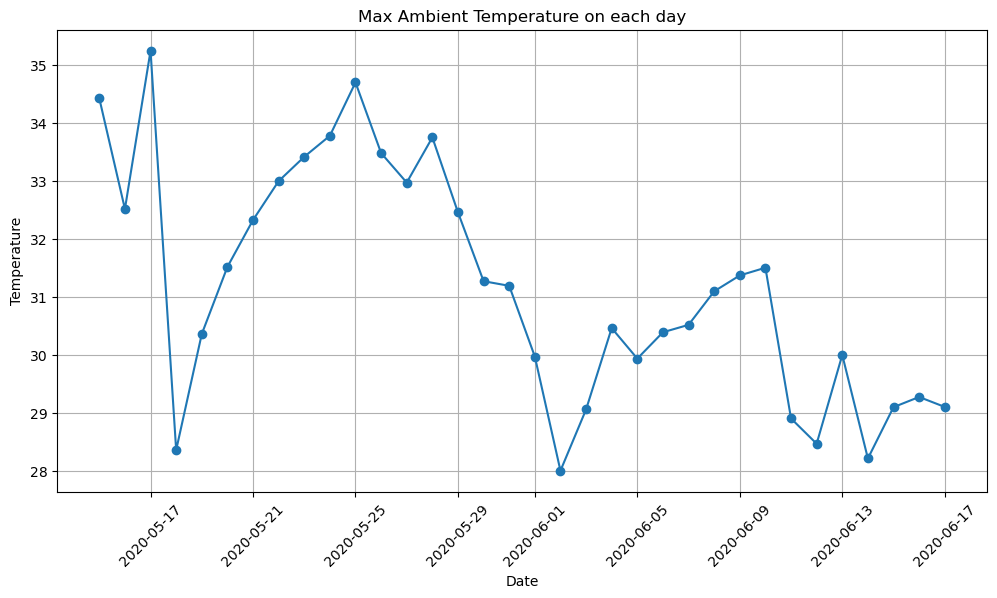

In [49]:
# Ambient Temperature on each day

plt.figure(figsize=(12, 6))
max_env_temp=merged_df.groupby('date')['ambient_temperature'].max()

plt.plot(max_env_temp.index,max_env_temp,marker='o')

plt.title('Max Ambient Temperature on each day')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    

## Observation:
> We can see from both graphs that as the environment temperature decreased, so, dc and ac power also decresed.

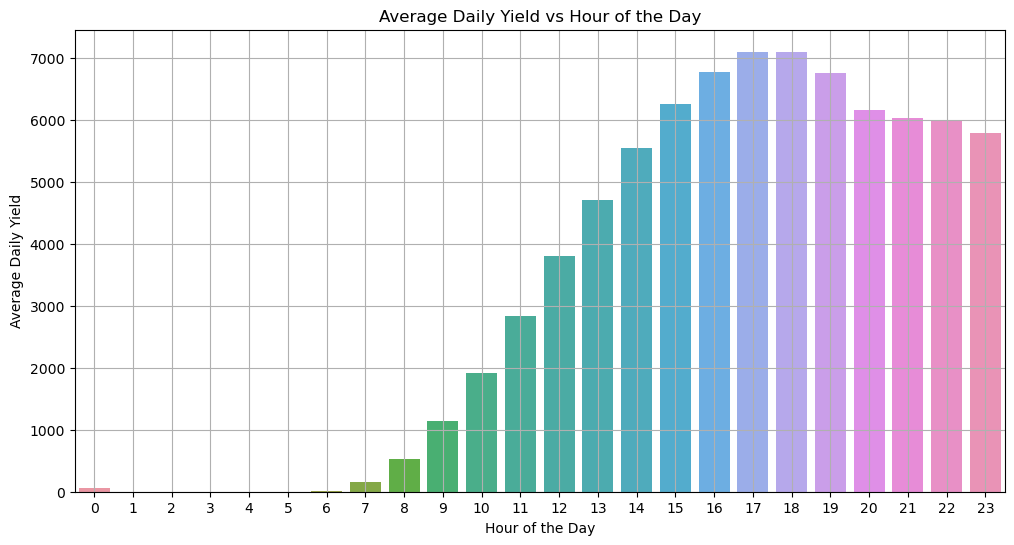

In [50]:
# Plotting average daily yield by hours
merged_df['hour'] = merged_df['date_time'].dt.hour

hourly_avg_yield = merged_df.groupby('hour')['daily_yield'].mean()
hourly_avg_yield

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_avg_yield.index, y=hourly_avg_yield)

plt.title('Average Daily Yield vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Daily Yield')
plt.grid(True)
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    

## Observation:
> At the night time when ac and dc powers are 0, daily yield is substanilly present there it suggests that there might be a discrepancy or inconsistency in the data or there is a delay in the whole process.

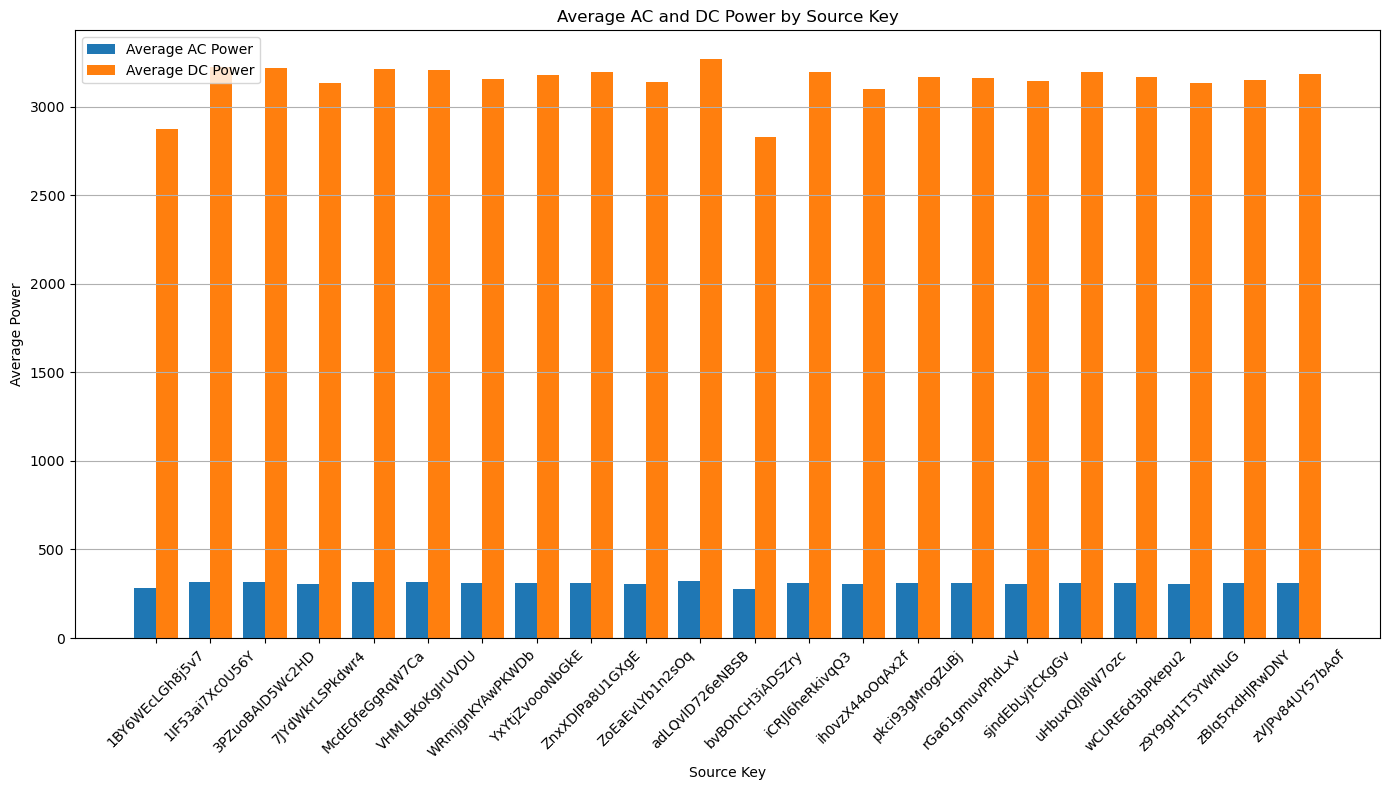

In [51]:
# Average ac and dc power producion for each inverter
average_power_by_source = merged_df.groupby('source_key')[['ac_power', 'dc_power']].mean()

plt.figure(figsize=(14, 8))
bar_width = 0.4

bar_positions_ac = range(len(average_power_by_source))
bar_positions_dc = [pos + bar_width for pos in bar_positions_ac]

plt.bar(bar_positions_ac, average_power_by_source['ac_power'], width=bar_width, label='Average AC Power', align='center')
plt.bar(bar_positions_dc, average_power_by_source['dc_power'], width=bar_width, label='Average DC Power', align='center')

plt.title('Average AC and DC Power by Source Key')
plt.xlabel('Source Key')
plt.ylabel('Average Power')
plt.xticks([pos + bar_width/2 for pos in bar_positions_ac], average_power_by_source.index, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    
## Observations:
> Inverters with source_key 1BY6WEcLGh8j5v7 and bvBOhCH3iADSZry are lacking behind in producing dc power in comparison to others.<br>
> The reason maybe shadow or the malfunction in these inverters.

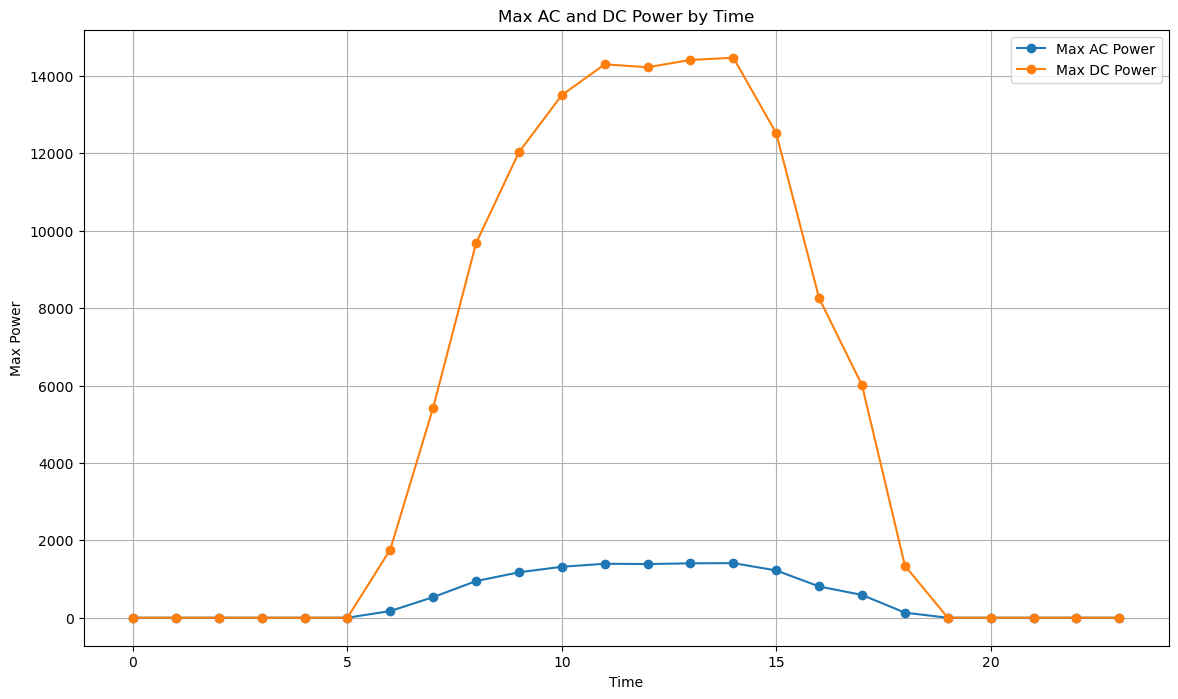

In [52]:
# Seeing Ac and DC power generation according to time

max_power_by_time = merged_df.groupby('hour')[['ac_power', 'dc_power']].max()
max_power_by_time.sort_index()

plt.figure(figsize=(14, 8))
plt.plot(max_power_by_time.index, max_power_by_time['ac_power'], label='Max AC Power', marker='o')
plt.plot(max_power_by_time.index, max_power_by_time['dc_power'], label='Max DC Power', marker='o')

plt.title('Max AC and DC Power by Time')
plt.xlabel('Time')
plt.ylabel('Max Power')
plt.grid(True)
plt.legend()
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    
## Observation:
> We can see the afternnon time is the most productive time, from 10AM to 3PM.

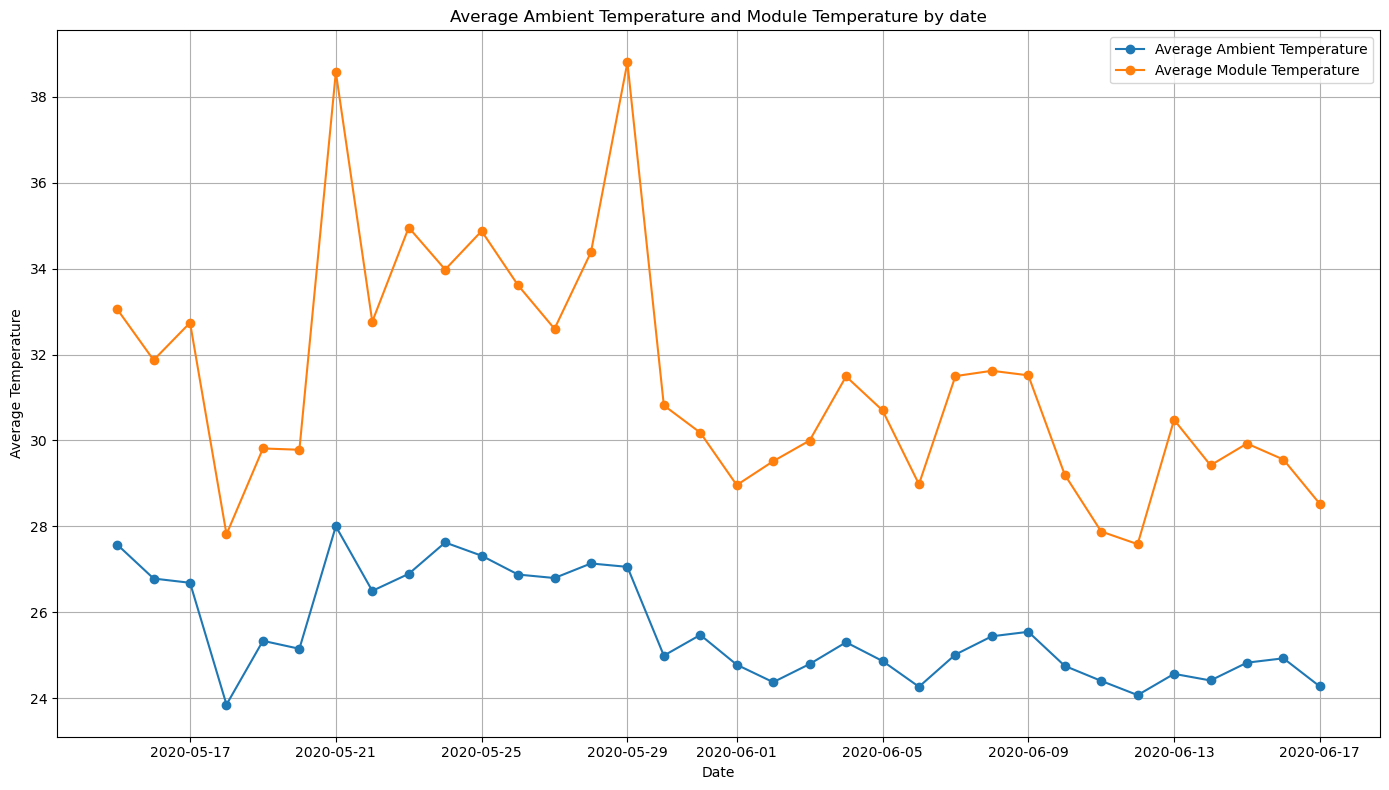

In [53]:
# Average Temperatures by dates
avg_temp_by_date = merged_df.groupby('date')['ambient_temperature'].mean()
avg_module_temp_by_date = merged_df.groupby('date')['module_temperature'].mean()

plt.figure(figsize=(14, 8))
plt.plot(avg_temp_by_date.index, avg_temp_by_date, label='Average Ambient Temperature', marker='o')
plt.plot(avg_module_temp_by_date.index, avg_module_temp_by_date, label='Average Module Temperature', marker='o')

plt.title('Average Ambient Temperature and Module Temperature by date')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    
## observation:
> As the Ambient Temperature moves module temperature also moves. Ambient temp is the cause for module temp.

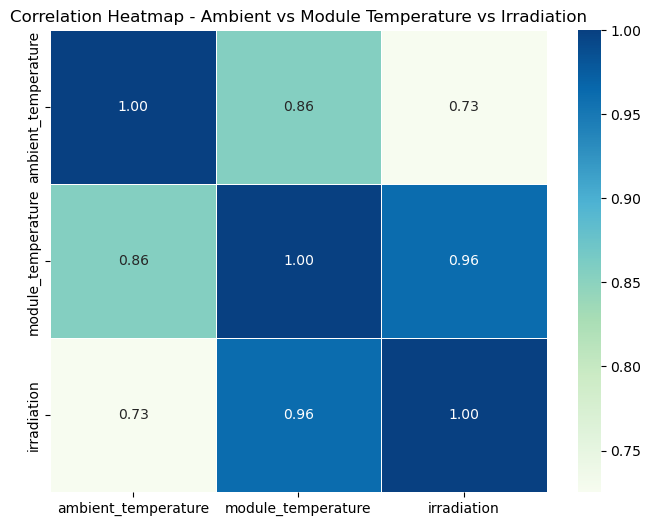

In [54]:
# Correlation of temperatures and Irradiation
df_corr = merged_df[['ambient_temperature', 'module_temperature','irradiation']]

plt.figure(figsize=(8, 6))
sns.heatmap( df_corr.corr(), annot=True, cmap='GnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap - Ambient vs Module Temperature vs Irradiation')
plt.show()

<div style="background-color: lightgray; padding: 5px;">
    
## Observation:
> Ambient temp, Module temp, and irradiation all have positive correlation.<br>
> With correlation coefficient 0.86, it implies that as ambient temperature increases, module temperature tends to increase, and vice versa. <br>
> With correlation coefficient 0.96, it implies that as module temperature increases, irradiation tends to increase, and vice versa.<br>
> Irradiation is the cause of module temp.

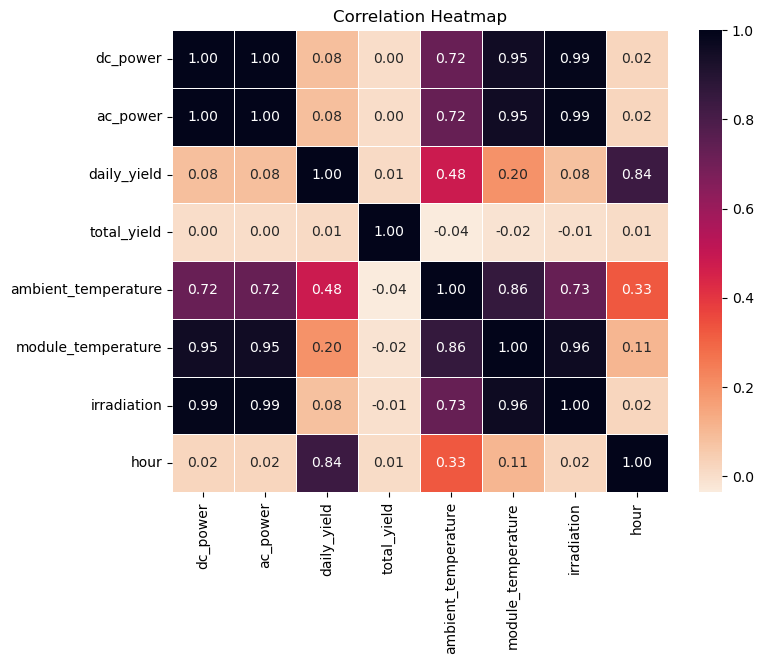

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap( merged_df.corr(), annot=True, cmap='rocket_r', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: lightgray; padding: 5px;">
 
## Observations:
> Total Yield can't be predicted as it has neither positive or negative strong correlation with one other.<br>
> DC power has a medium relationship with ambient temp, strongest relationship with irradiation and a strong relationship with module temp.<br>
> AC Power has relationship same as DC power.<br>
> Daily Yield has a strong relationship with time.<br>


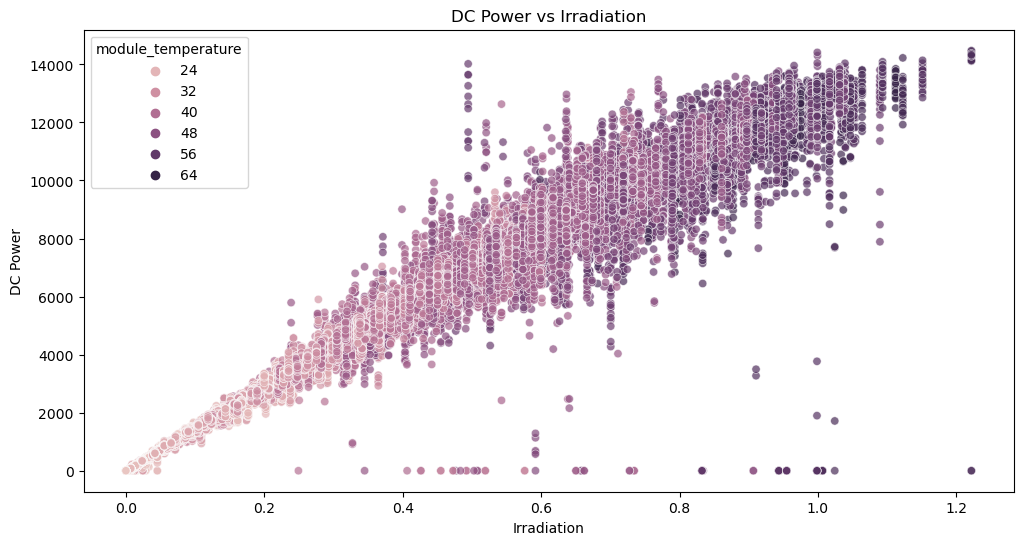

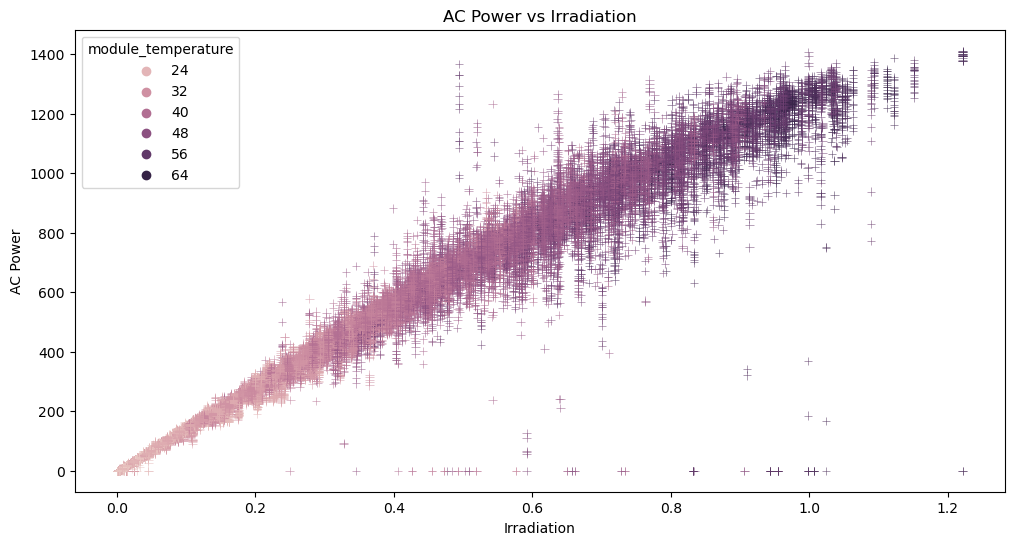

In [56]:
# Scatter plot for DC and AC Power vs Irradiation

plt.figure(figsize=(12, 6))
sns.scatterplot(x='irradiation', y='dc_power',hue='module_temperature', data=merged_df, alpha=0.7)
plt.title('DC Power vs Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('DC Power')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='irradiation', y='ac_power',hue='module_temperature', data=merged_df, alpha=0.7,marker='+')
plt.title('AC Power vs Irradiation')
plt.xlabel('Irradiation')
plt.ylabel('AC Power')
plt.show()

<div style="background-color: lightgray; padding: 5px;">
 
## Observations:
> The strongest relationship with irradiation makes sense in the context of solar power generation, as irradiation is a crucial factor for the production of DC power.<br>
> A strong relationship with module temperature is expected, as the temperature of solar modules can impact their efficiency.<br>
> The similarity in relationships between AC power and DC power is expected, as AC power is essentially the output of the inverter that converts DC power. Therefore, they should have similar correlations with other variables.

# --------------------------------------------------------------------------------------------------------------

<div style="background-color: black; color: white; padding: 10px;">
  
# Machine Learning

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [58]:
data=merged_df.copy()

<div style="background-color: orange; padding: 10px;">

# Predicting DC Power

In [59]:
X = data[[ 'hour','module_temperature','ambient_temperature']]
y = data['dc_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color: darkblue; color: white; padding: 5px;">

## MultiLinear Regression

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Equation for the Linear Regression is:\n y_pred={model.intercept_:.2f} + hour * ({model.coef_[0]:.2f}) + Module_temperature * ({model.coef_[1]:.2f}) + Ambient_Temperature * ({model.coef_[2]:.2f})")

test_score = 100*model.score(X_test,y_test)
print(f'\nTest set R-square score = {test_score:4.4f}%')

train_score = 100*model.score(X_train,y_train)
print(f'\nTrain set R-square score = {train_score:4.4f}%')

Equation for the Linear Regression is:
 y_pred=871.12 + hour * (0.72) + Module_temperature * (409.10) + Ambient_Temperature * (-411.48)

Test set R-square score = 94.1628%

Train set R-square score = 94.3691%


In [61]:
y_test=np.array(y_test)
concatenated_array = np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)

#np.set_printoptions(threshold=np.inf)
print(concatenated_array)

[[ 9649.97550292  8937.875     ]
 [  527.05067034     0.        ]
 [ 6503.99971768  6264.571429  ]
 ...
 [  221.61197236     0.        ]
 [ -171.89835139     0.        ]
 [10195.5287378  11223.57143   ]]


### observation:
> As per the R-squared values, the model is quite good.<br>
> But from the concatenated array we can observe that, it is predicting in 100s even for 0 DC Power in reality.

<div style="background-color: darkblue; color: white; padding: 5px;">

## Polynomial Regression

In [62]:
poly_reg = PolynomialFeatures(degree=3)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

test_score = 100 * poly_model.score(X_poly_test, y_test)
print(f'Test set R-square score = {test_score:4.4f}%')

train_score = 100 * poly_model.score(X_poly_train, y_train)
print(f'Train set R-square score = {train_score:4.4f}%')

Test set R-square score = 95.0704%
Train set R-square score = 95.1347%


In [63]:
concatenated_array = np.concatenate((y_pred_poly.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)
print(concatenated_array)

[[ 9985.56255584  8937.875     ]
 [  510.69335955     0.        ]
 [ 6678.74595945  6264.571429  ]
 ...
 [  -45.32319805     0.        ]
 [ -297.71465941     0.        ]
 [10096.78162572 11223.57143   ]]


### Observation:
> The polynomial model improved the r-square percentage by 1 but there is not much change seen.

<div style="background-color: darkblue; color: white; padding: 5px;">

## Random Forest

In [64]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

test_score_rf = 100 * rf_model.score(X_test, y_test)
print(f'Test set R-square score (Random Forest) = {test_score_rf:4.4f}%')

train_score_rf = 100 * rf_model.score(X_train, y_train)
print(f'Train set R-square score (Random Forest) = {train_score_rf:4.4f}%')


Test set R-square score (Random Forest) = 98.6374%
Train set R-square score (Random Forest) = 98.6808%


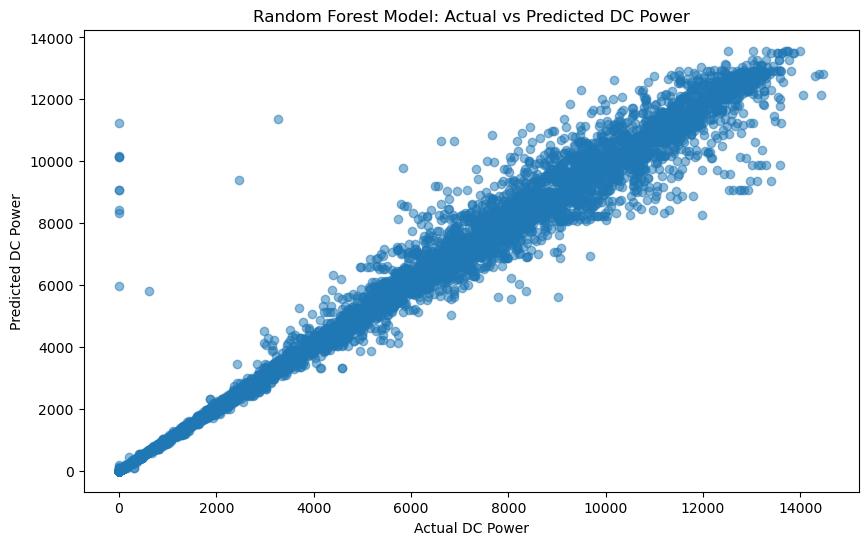

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted DC Power')
plt.xlabel('Actual DC Power')
plt.ylabel('Predicted DC Power')
plt.show()

In [66]:
concatenated_array = np.concatenate((y_pred_rf.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)
print(concatenated_array)

[[10117.63113026  8937.875     ]
 [    0.             0.        ]
 [ 6889.88307291  6264.571429  ]
 ...
 [    0.             0.        ]
 [    0.             0.        ]
 [10532.33290075 11223.57143   ]]


<div style="background-color: lightgray; padding: 5px;">
 
### Observation: We are finalizing this model (Random Forest) as this is showing the best match with real values with 98% R2 Score

<div style="background-color: red; padding: 5px;">

# Predict DC Power here just by giving Hour,module temperature,and ambient temperature 

In [67]:
def predict_dc_power(hour, module, ambient):
    """
    Predict DC power using a trained Random Forest model.

    Parameters:
    - model: Trained Random Forest model
    - input_values: List of input values [hour, module_temperature, ambient_temperature]

    Returns:
    - Predicted DC power
    """
    input_values = [[hour, module, ambient]]
    predicted_dc_power = rf_model.predict(input_values)
    
    return predicted_dc_power[0]    

In [68]:
hour=input("Enter hour hand (24 hour values): ")
mod_temp=input("Enter Module Temperature: ")
am_temp=input("Enter Ambient Temperature: ")

predict_dc_power(hour, mod_temp, am_temp)

Enter hour hand (24 hour values): 23
Enter Module Temperature: 22
Enter Ambient Temperature: 25


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.0

# --------------------------------------------

<div style="background-color: orange; padding: 10px;">

# Predicting Module Temperature

In [69]:
X = data[['ambient_temperature']]
y = data['module_temperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
train_score = 100 * lr_model.score(X_train, y_train)
print(f'Train set R-square score = {train_score_rf:4.4f}%')
train_score = 100 * lr_model.score(X_test, y_test)
print(f'Train set R-square score  = {train_score_rf:4.4f}%')

Mean Squared Error: 39.8231
Train set R-square score = 98.6808%
Train set R-square score  = 98.6808%


In [70]:
y_test=np.array(y_test)
concatenated_array = np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)
print(concatenated_array)

[[45.79323039 51.81301867]
 [25.75068044 23.06779587]
 [37.03309107 41.31692333]
 ...
 [21.23776542 20.86307993]
 [36.11868016 24.68879464]
 [41.57506288 51.79728807]]


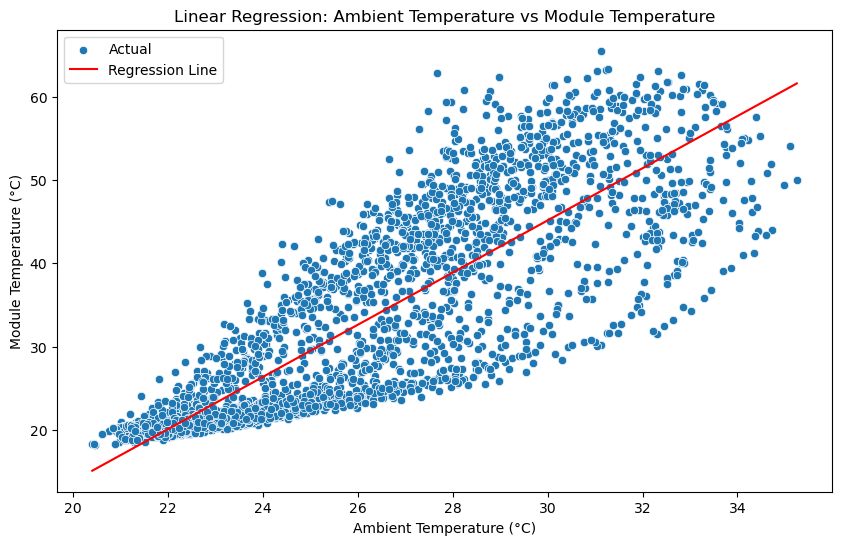

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['ambient_temperature'], y=y_test, label='Actual')
sns.lineplot(x=X_test['ambient_temperature'], y=y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Ambient Temperature vs Module Temperature')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Module Temperature (°C)')
plt.legend()
plt.show()

<div style="background-color: red; padding: 5px;">

# Predict Module Temperature here just by giving Ambient Temperature

In [72]:
def predict_module_temp_rf(ambient_temp):
    """
    Predict module temperature using a trained Random Forest Regressor model.

    Parameters:
    - model: Trained Random Forest Regressor model
    - ambient_temp: Ambient temperature value for prediction

    Returns:
    - Predicted module temperature
    """

    ambient_temp = np.array([[ambient_temp]])

    predicted_module_temp = lr_model.predict(ambient_temp)

    return predicted_module_temp[0]

tmp=int(input("Enter the value of ambient temperature in Celsius: "))
print(f'Predicted Module Temperature: {predict_module_temp_rf(tmp):.2f} °C')

Enter the value of ambient temperature in Celsius: 25
Predicted Module Temperature: 29.50 °C


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# -----------------------------------------------------------------------------------------------------------------

<div style="background-color: black; color: white; padding: 10px;">
  
# Statistical Assumptions with plant 2

In [73]:
pg2=pd.read_csv("Plant_2_Generation_Data.csv")
w2=pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

pg2.columns=pg2.columns.str.lower()
w2.columns=w2.columns.str.lower()

pg2.drop(columns='plant_id',inplace=True)
w2.drop(columns=['plant_id','source_key'],inplace=True)

pg2['date_time']=pd.to_datetime(pg2['date_time'])
w2['date_time']=pd.to_datetime(w2['date_time'])

display(pg2.head())
print(pg2.shape)
display(w2.head())
print(w2.shape)

,date_time,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


(67698, 6)


,date_time,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0


(3259, 4)


In [74]:
display(pg1.head())
print(pg1.shape)
display(w1.head())
print(w1.shape)

,date_time,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


(68778, 6)


,date_time,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0


(3182, 4)


<div style="background-color: darkblue; color: white; padding: 5px;">

## Checking if total yield mean of both plants is same or not

In [75]:
from scipy import stats

In [76]:
pg2_total_mean=pg2.total_yield.mean()
pg1_total_mean=pg1.total_yield.mean()
print(f"Plant 1 Total yield mean= {pg1_total_mean} \nPlant 2 Total yield mean= {pg2_total_mean}")

Plant 1 Total yield mean= 6978711.76067105 
Plant 2 Total yield mean= 658944788.4237648


<div style="background-color: orange; padding: 10px;">

## Hypothesis (Significance Level = 5%)
### Null Hypothesis:    pg1_total_mean = pg2_total_mean<br> Alternative Hypothesis:   pg1_total_mean != pg2_total_mean

In [77]:
result = stats.ttest_ind(pg1.total_yield, pg2.total_yield, equal_var=False)
print(f"T-test p-value: {result.pvalue:.6f}")

T-test p-value: 0.000000


<div style="background-color: red; padding: 5px;">

## Conclusion:<br> As p-value is below 5% we need to reject the null hypothesis and will say that total yield of both plant are very different.


<div style="background-color: darkblue; color: white; padding: 5px;">

## Checking if daily yield mean of both plants is same or not

In [78]:
pg2_daily_mean=pg2.daily_yield.mean()
pg1_daily_mean=pg1.daily_yield.mean()
print(f"Plant 1 Daily yield mean= {pg1_daily_mean} \nPlant 2 Daily yield mean= {pg2_daily_mean}")

Plant 1 Daily yield mean= 3295.968737182587 
Plant 2 Daily yield mean= 3294.8902951797813


<div style="background-color: orange; padding: 10px;">

## Hypothesis: (Significance Level = 5%)
### Null Hypothesis: pg1_daily_mean = pg2_daily_mean <br>Alternative Hypothesis: pg1_daily_mean != pg2_daily_mean

In [79]:
result = stats.ttest_ind(pg1.daily_yield, pg2.daily_yield, equal_var=False)
print(f"T-test p-value: {result.pvalue:.6f}")

T-test p-value: 0.947645


<div style="background-color: red; padding: 5px;">

## Conclusion: <br>As p-value is above 5% we can't reject the null hypothesis and will say that daily yield mean of both plants is same.

<div style="background-color: darkblue; color: white; padding: 5px;">

## Checking if irradiation on solar panels of both plants is same or not

In [80]:
w1_irr_mean=w1.irradiation.mean()
w2_irr_mean=w2.irradiation.mean()
print(f"Plant 1 irradiation mean= {w1_irr_mean} \nPlant 2 irradiation mean= {w2_irr_mean}")

Plant 1 irradiation mean= 0.22831283005216815 
Plant 2 irradiation mean= 0.23273697972872875


<div style="background-color: orange; padding: 10px;">

## Hypothesis: (Significance Level = 5%)
### Null Hypothesis: w1_irr_mean = w2_irr_mean <br>Alternative Hypothesis: w1_irr_mean != w2_irr_mean

In [81]:
result = stats.ttest_ind(w1.irradiation, w2.irradiation, equal_var=False)
print(f"T-test p-value: {result.pvalue:.6f}")

T-test p-value: 0.562807


<div style="background-color: red; padding: 5px;">

## Conclusion:<br>As p-value is above 5%, we can't reject the null hypothesis and will say that irradiation on solar panels of both plants is same.

<div style="background-color: yellow; padding: 10px;">

## Suggestion:
> As both plants are having almost an equal amount of irradiation still the yield of plant 2 is way high.<br>
> Need to reconsider the inverter loss, maintainance of solar panels in plant 1.

<div style="background-color:violet;font-color: white; padding: 10px; color: white;">
    
# Tableau Dashboard links:
### <a href="https://public.tableau.com/app/profile/piyush.agrawal3761/viz/Dashboard1Solar/Dashboard1">Dashboard 1</a><br> DC and AC Power by dates
### <a href="https://public.tableau.com/app/profile/piyush.agrawal3761/viz/Dashboard2Solar/Dashboard2">Dashboard 2</a><br> Total yiled of both plants
### <a href="https://public.tableau.com/app/profile/piyush.agrawal3761/viz/Dashboard2Solar/Dashboard3">Dashboard 3</a><br>AC and DC Power by time of the day
</div>